In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [19]:
bmi_labels = ["Underweight", "Healthy weight", "Overweight", "Obese"]
cut_bins = [0, 18.5, 24.9, 29.9, 150]
df['bmi_label'] = pd.cut(df['bmi'], bins=cut_bins, labels=bmi_labels)
print(df)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

           bmi_label  
0         Overweight  
1              Obese  
2              Obese  
3     Healthy weight  
4         Overweight  
...              ... 

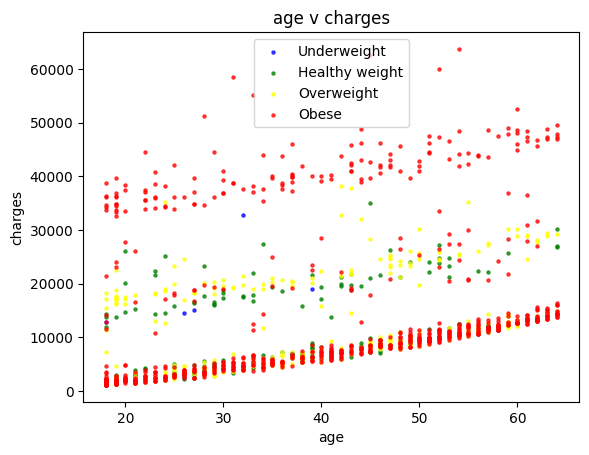

In [20]:
bmi_colors = {"Underweight": "blue", "Healthy weight": "green", "Overweight": "yellow", "Obese": "red"}

fig, ax = plt.subplots()
for bmi_label, dftemp in df.groupby('bmi_label'):
    dftemp.plot('age', 'charges', kind='scatter', c=bmi_colors[bmi_label], label=bmi_label, marker='.', alpha=.7, ax=ax)
plt.title('age v charges')
plt.show()

In [21]:
ovw_smokers = df.loc[(df['smoker'] == 'yes') & ((df['bmi_label'] == "Overweight") | (df['bmi_label'] == 'Obese'))]
print(ovw_smokers)

      age     sex     bmi  children smoker     region      charges   bmi_label
0      19  female  27.900         0    yes  southwest  16884.92400  Overweight
11     62  female  26.290         0    yes  southeast  27808.72510  Overweight
14     27    male  42.130         0    yes  southeast  39611.75770       Obese
19     30    male  35.300         0    yes  southwest  36837.46700       Obese
23     34  female  31.920         1    yes  northeast  37701.87680       Obese
...   ...     ...     ...       ...    ...        ...          ...         ...
1308   25  female  30.200         0    yes  southwest  33900.65300       Obese
1313   19  female  34.700         2    yes  southwest  36397.57600       Obese
1321   62    male  26.695         0    yes  northeast  28101.33305  Overweight
1323   42  female  40.370         2    yes  southeast  43896.37630       Obese
1337   61  female  29.070         0    yes  northwest  29141.36030  Overweight

[219 rows x 8 columns]


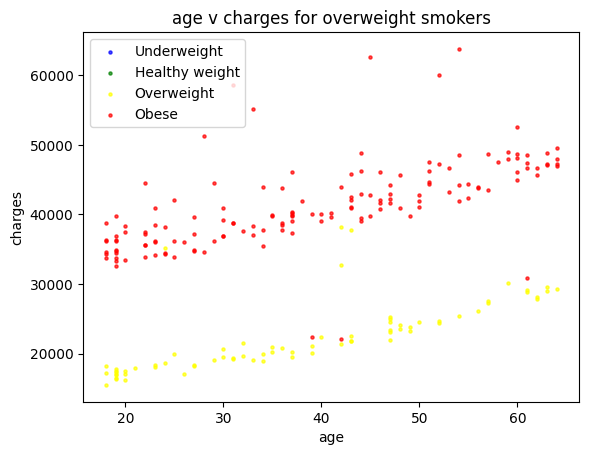

In [22]:
fig, ax = plt.subplots()
for bmi_label, ovw_smokers_temp in ovw_smokers.groupby('bmi_label'):
    ovw_smokers_temp.plot('age', 'charges', kind='scatter', c=bmi_colors[bmi_label], label=bmi_label, marker='.', alpha=.7, ax=ax)

plt.title('age v charges for overweight smokers')
plt.show()

In [23]:
m_obs_smokers = df.loc[(df['smoker'] == 'yes') & (df['bmi_label'] == 'Obese') & (df['sex'] == 'male')]

print(m_obs_smokers)

      age   sex     bmi  children smoker     region      charges bmi_label
14     27  male  42.130         0    yes  southeast  39611.75770     Obese
19     30  male  35.300         0    yes  southwest  36837.46700     Obese
29     31  male  36.300         2    yes  southwest  38711.00000     Obese
30     22  male  35.600         0    yes  southwest  35585.57600     Obese
34     28  male  36.400         1    yes  southwest  51194.55914     Obese
...   ...   ...     ...       ...    ...        ...          ...       ...
1284   61  male  36.300         1    yes  southwest  47403.88000     Obese
1288   20  male  39.400         2    yes  southwest  38344.56600     Obese
1291   19  male  34.900         0    yes  southwest  34828.65400     Obese
1300   45  male  30.360         0    yes  southeast  62592.87309     Obese
1301   62  male  30.875         3    yes  northwest  46718.16325     Obese

[94 rows x 8 columns]


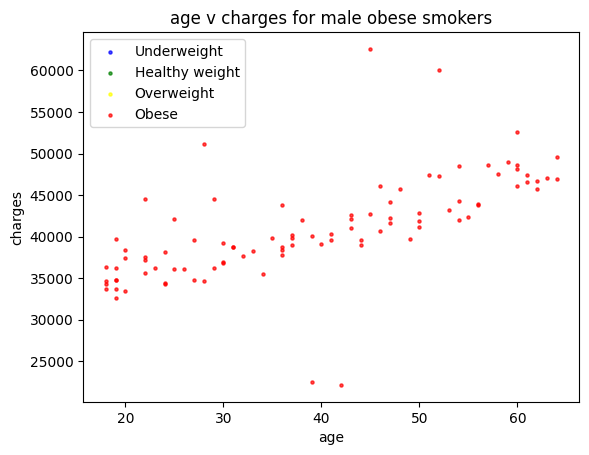

In [24]:
fig, ax = plt.subplots()
for bmi_label, m_obs_smokers_temp in m_obs_smokers.groupby('bmi_label'):
    m_obs_smokers_temp.plot('age', 'charges', kind='scatter', c=bmi_colors[bmi_label], label=bmi_label, marker='.', alpha=.7, ax=ax)

plt.title('age v charges for male obese smokers')
plt.show()

In [25]:
#create a 1D list of lists for age as the x axis and charges as the y axis
x = m_obs_smokers.iloc[:, 0].values.reshape(-1,1)
y = m_obs_smokers.iloc[:, 6].values.reshape(-1,1)

In [26]:
#create an age list that covers the range of min to max ages in the x axis incrementally increasing by .01 of an age
# *100 and /100 are used because range works at an integer level not a float level
age_list = [g/100 for g in range(m_obs_smokers['age'].min()*100, (m_obs_smokers['age'].max()*100)+1)]

In [27]:
df_plot1 = pd.DataFrame(columns=['age'])
df_plot1['age'] = age_list

df_plot2 = df_plot1.copy(deep=True)

print(df_plot1)

        age
0     18.00
1     18.01
2     18.02
3     18.03
4     18.04
...     ...
4596  63.96
4597  63.97
4598  63.98
4599  63.99
4600  64.00

[4601 rows x 1 columns]


In [28]:
dtr2 = DecisionTreeRegressor(max_depth=2, min_samples_leaf=3)
dtr4 = DecisionTreeRegressor(max_depth=4, min_samples_leaf=3)
dtr6 = DecisionTreeRegressor(max_depth=6, min_samples_leaf=3)
dtr8 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=3)

dtr2.fit(x, y)
dtr4.fit(x, y)
dtr6.fit(x, y)
dtr8.fit(x, y)

df_plot1['dtr2'] = dtr2.predict(df_plot2)
df_plot1['dtr4'] = dtr4.predict(df_plot2)
df_plot1['dtr6'] = dtr6.predict(df_plot2)
df_plot1['dtr8'] = dtr8.predict(df_plot2)

print(df_plot1)

        age          dtr2          dtr4          dtr6          dtr8
0     18.00  35392.020977  34740.373213  34740.373213  34740.373213
1     18.01  35392.020977  34740.373213  34740.373213  34740.373213
2     18.02  35392.020977  34740.373213  34740.373213  34740.373213
3     18.03  35392.020977  34740.373213  34740.373213  34740.373213
4     18.04  35392.020977  34740.373213  34740.373213  34740.373213
...     ...           ...           ...           ...           ...
4596  63.96  47230.046073  47904.596474  47840.818567  47840.818567
4597  63.97  47230.046073  47904.596474  47840.818567  47840.818567
4598  63.98  47230.046073  47904.596474  47840.818567  47840.818567
4599  63.99  47230.046073  47904.596474  47840.818567  47840.818567
4600  64.00  47230.046073  47904.596474  47840.818567  47840.818567

[4601 rows x 5 columns]


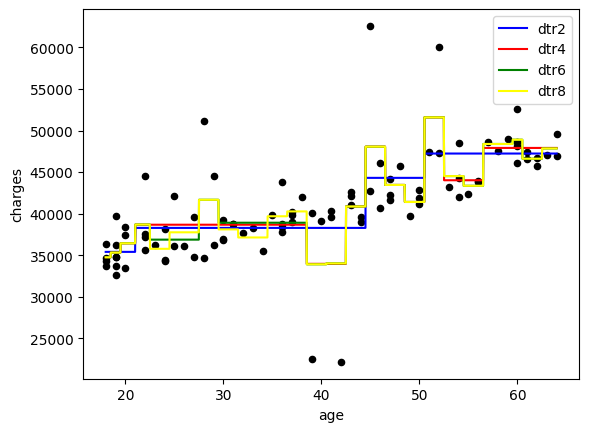

In [29]:
fig, ax = plt.subplots()
m_obs_smokers.plot('age', 'charges', kind='scatter', color='black', ax=ax)
df_plot1.plot('age', 'dtr2', kind='line', color='blue', ax=ax)
df_plot1.plot('age', 'dtr4', kind='line', color='red', ax=ax)
df_plot1.plot('age', 'dtr6', kind='line', color='green', ax=ax)
df_plot1.plot('age', 'dtr8', kind='line', color='yellow', ax=ax)


plt.show()

In [30]:
# the greater the flexibility in a decision tree the more closely it tries to fit
# the data points likely leading to overfitting as seen in these graphs which shows the
# 8 depth tree as moving up and down seemingly at random but 2 depth tree shows a steady increase

In [33]:
# min sample leaf is like a bin size.  3, 5, 7 or 9 samples need to be held within a leaf in the below decision trees
# accordingly we will see overfitting more likely in leaf3 then in leaf9 which is the inverse of depth
dtr4_leaf3 = DecisionTreeRegressor(max_depth=4, min_samples_leaf=3)
dtr4_leaf5 = DecisionTreeRegressor(max_depth=4, min_samples_leaf=5)
dtr4_leaf7 = DecisionTreeRegressor(max_depth=4, min_samples_leaf=7)
dtr4_leaf9 = DecisionTreeRegressor(max_depth=4, min_samples_leaf=9)

dtr4_leaf3.fit(x, y)
dtr4_leaf5.fit(x, y)
dtr4_leaf7.fit(x, y)
dtr4_leaf9.fit(x, y)

df_plot1['leaf3'] = dtr4_leaf3.predict(df_plot2)
df_plot1['leaf5'] = dtr4_leaf5.predict(df_plot2)
df_plot1['leaf7'] = dtr4_leaf7.predict(df_plot2)
df_plot1['leaf9'] = dtr4_leaf9.predict(df_plot2)

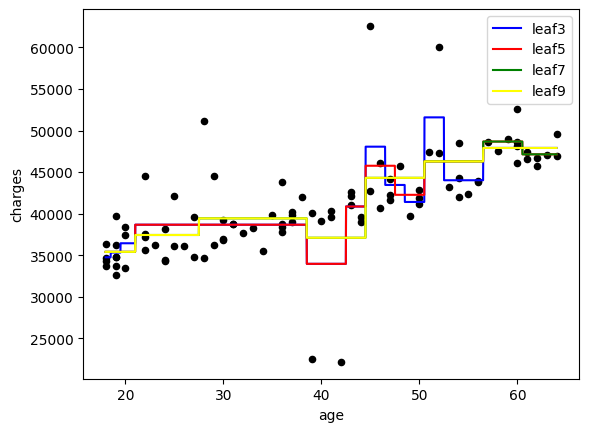

In [36]:
fig, ax = plt.subplots()


m_obs_smokers.plot('age', 'charges', kind='scatter', color='black', ax=ax)
df_plot1.plot('age', 'leaf3', kind='line', color='blue', ax=ax)
df_plot1.plot('age', 'leaf5', kind='line', color='red', ax=ax)
df_plot1.plot('age', 'leaf7', kind='line', color='green', ax=ax)
df_plot1.plot('age', 'leaf9', kind='line', color='yellow', ax=ax)

plt.show()

[Text(0.5, 0.8333333333333334, 'x[0] <= 44.5\nsquared_error = 37745706.89\nsamples = 94\nvalue = 40932.961'),
 Text(0.25, 0.5, 'x[0] <= 21.0\nsquared_error = 19158652.037\nsamples = 58\nvalue = 37630.337'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 4075306.57\nsamples = 13\nvalue = 35392.021'),
 Text(0.375, 0.16666666666666666, 'squared_error = 21650589.667\nsamples = 45\nvalue = 38276.961'),
 Text(0.75, 0.5, 'x[0] <= 50.5\nsquared_error = 21806694.18\nsamples = 36\nvalue = 46253.855'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 33781507.444\nsamples = 12\nvalue = 44301.471'),
 Text(0.875, 0.16666666666666666, 'squared_error = 12960437.682\nsamples = 24\nvalue = 47230.046')]

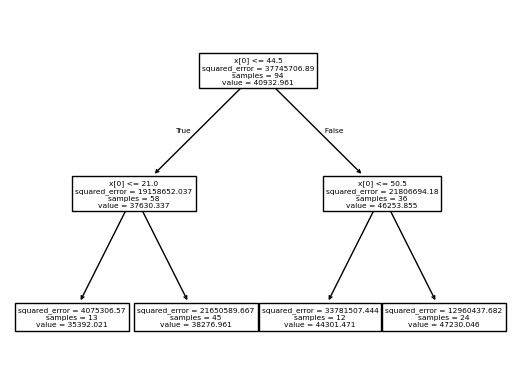

In [40]:
tree.plot_tree(dtr2)